In [2]:
library(arrow)
library(cowplot)
library(data.table)
library(dplyr)
library(finalfit)
library(ggplot2)
library(ggridges)
library(ggsci)
library(lubridate)
library(readxl)
library(stringr)
library(tidyverse)
require(plyr)
theme_set(theme_bw(base_size=16))
options(repr.plot.width=15, repr.plot.height=15)



Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from ‘package:cowplot’:

    stamp


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


── Attaching packages ───────────────── tidyverse 1.3.0 ──

✔ tibble  3.1.0     ✔ purrr   0.3.4
✔ tidyr   1.1.3     ✔ forcats 0.5.1
✔ readr   1.4.0     

── Conflicts ──────────────────── tidyverse_conflicts() ──
✖ lubridate::as.difftime() masks base::as.difftime()
✖ d

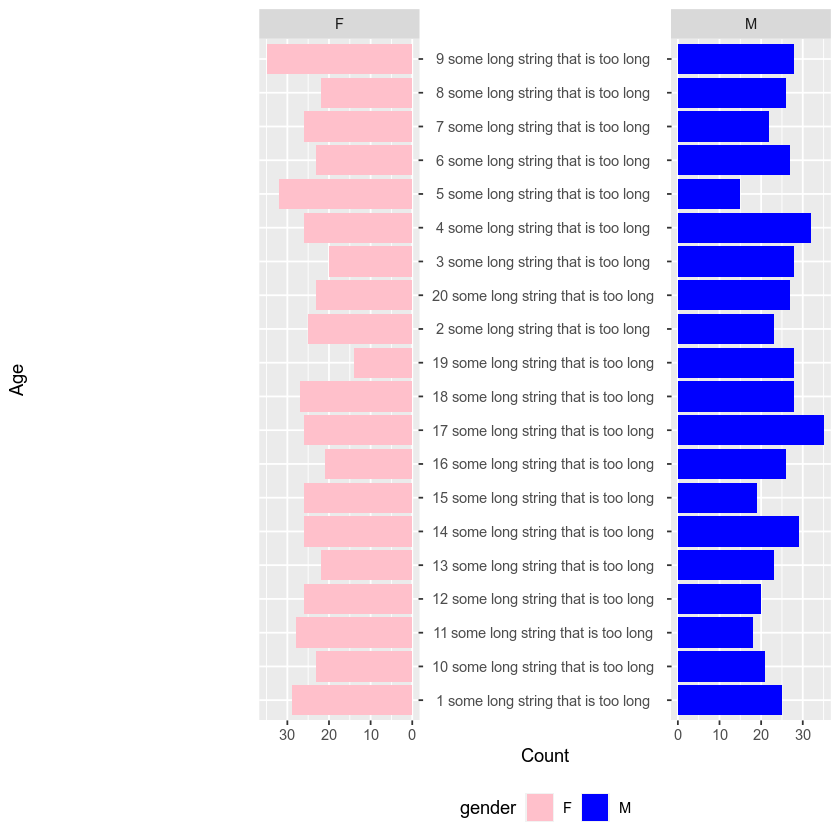

In [18]:
library(ggplot2)
library(ggpol)
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)

p <- ggplot(df_h, aes(x = factor(age), y = count, fill = gender)) + 
  geom_bar(stat = "identity") +
  facet_share(~gender, dir = "h", scales = "free", reverse_num = TRUE) + 
  coord_flip() +
  labs(x = "Age", y = "Count") + 
  theme(legend.position = "bottom") +   scale_fill_manual(values = c("pink", "blue"))


p

In [3]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_up_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_max <- count[count$count.x > 2, ]
count_max$Type = 'Up ↗ (EXOTIC-up > 0.8)'

In [85]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_max_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_max <- count[count$count.x > 2, ]
count_max$Type = 'Up ↗ (EXOTIC-max > 0.9)'

In [4]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_down_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_min <- count[count$count.x > 2, ]
count_min$count.x <- count_min$count.x * -1
count_min$Type = 'Down ↘ (EXOTIC-down > 0.8)'

In [86]:
df <- read_excel('/gstock/EXOTIC/data/EXOTIC/EXOTIC_min_Rdata.xlsx')

colnames(df) <- c('Tissue', 'EXOTIC_max', 'symbol', 'MAP')

count_exons <- ddply(df, .(Tissue), mutate, count = length(unique(MAP)))
count_exons = unique(count_exons[,c("Tissue", "count")])
count_genes <- ddply(df, .(Tissue), mutate, count = length(unique(symbol)))
count_genes = unique(count_genes[,c("Tissue", "count")])
count <- merge(count_exons, count_genes, by='Tissue')
count_min <- count[count$count.x > 2, ]
count_min$count.x <- count_min$count.x * -1
count_min$Type = 'Down ↘ (EXOTIC-min < 0.1)'

In [5]:
merge_count <- rbind(count_max, count_min)
head(merge_count)

,Tissue,count.x,count.y,Type
,<chr>,<dbl>,<int>,<chr>
1,Adipose - Subcutaneous,522,936,Up ↗ (EXOTIC-up > 0.8)
2,Adipose - Visceral (Omentum),508,884,Up ↗ (EXOTIC-up > 0.8)
3,Adrenal Gland,589,1196,Up ↗ (EXOTIC-up > 0.8)
4,Artery - Aorta,605,1213,Up ↗ (EXOTIC-up > 0.8)
5,Artery - Coronary,519,889,Up ↗ (EXOTIC-up > 0.8)
6,Artery - Tibial,771,1555,Up ↗ (EXOTIC-up > 0.8)


In [27]:
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)





# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)
head(df)

,gender,age,count
,<chr>,<chr>,<int>
1,F,1 some long string that is too long,28
2,M,1 some long string that is too long,21
3,F,10 some long string that is too long,20
4,M,10 some long string that is too long,21
5,F,11 some long string that is too long,32
6,M,11 some long string that is too long,20


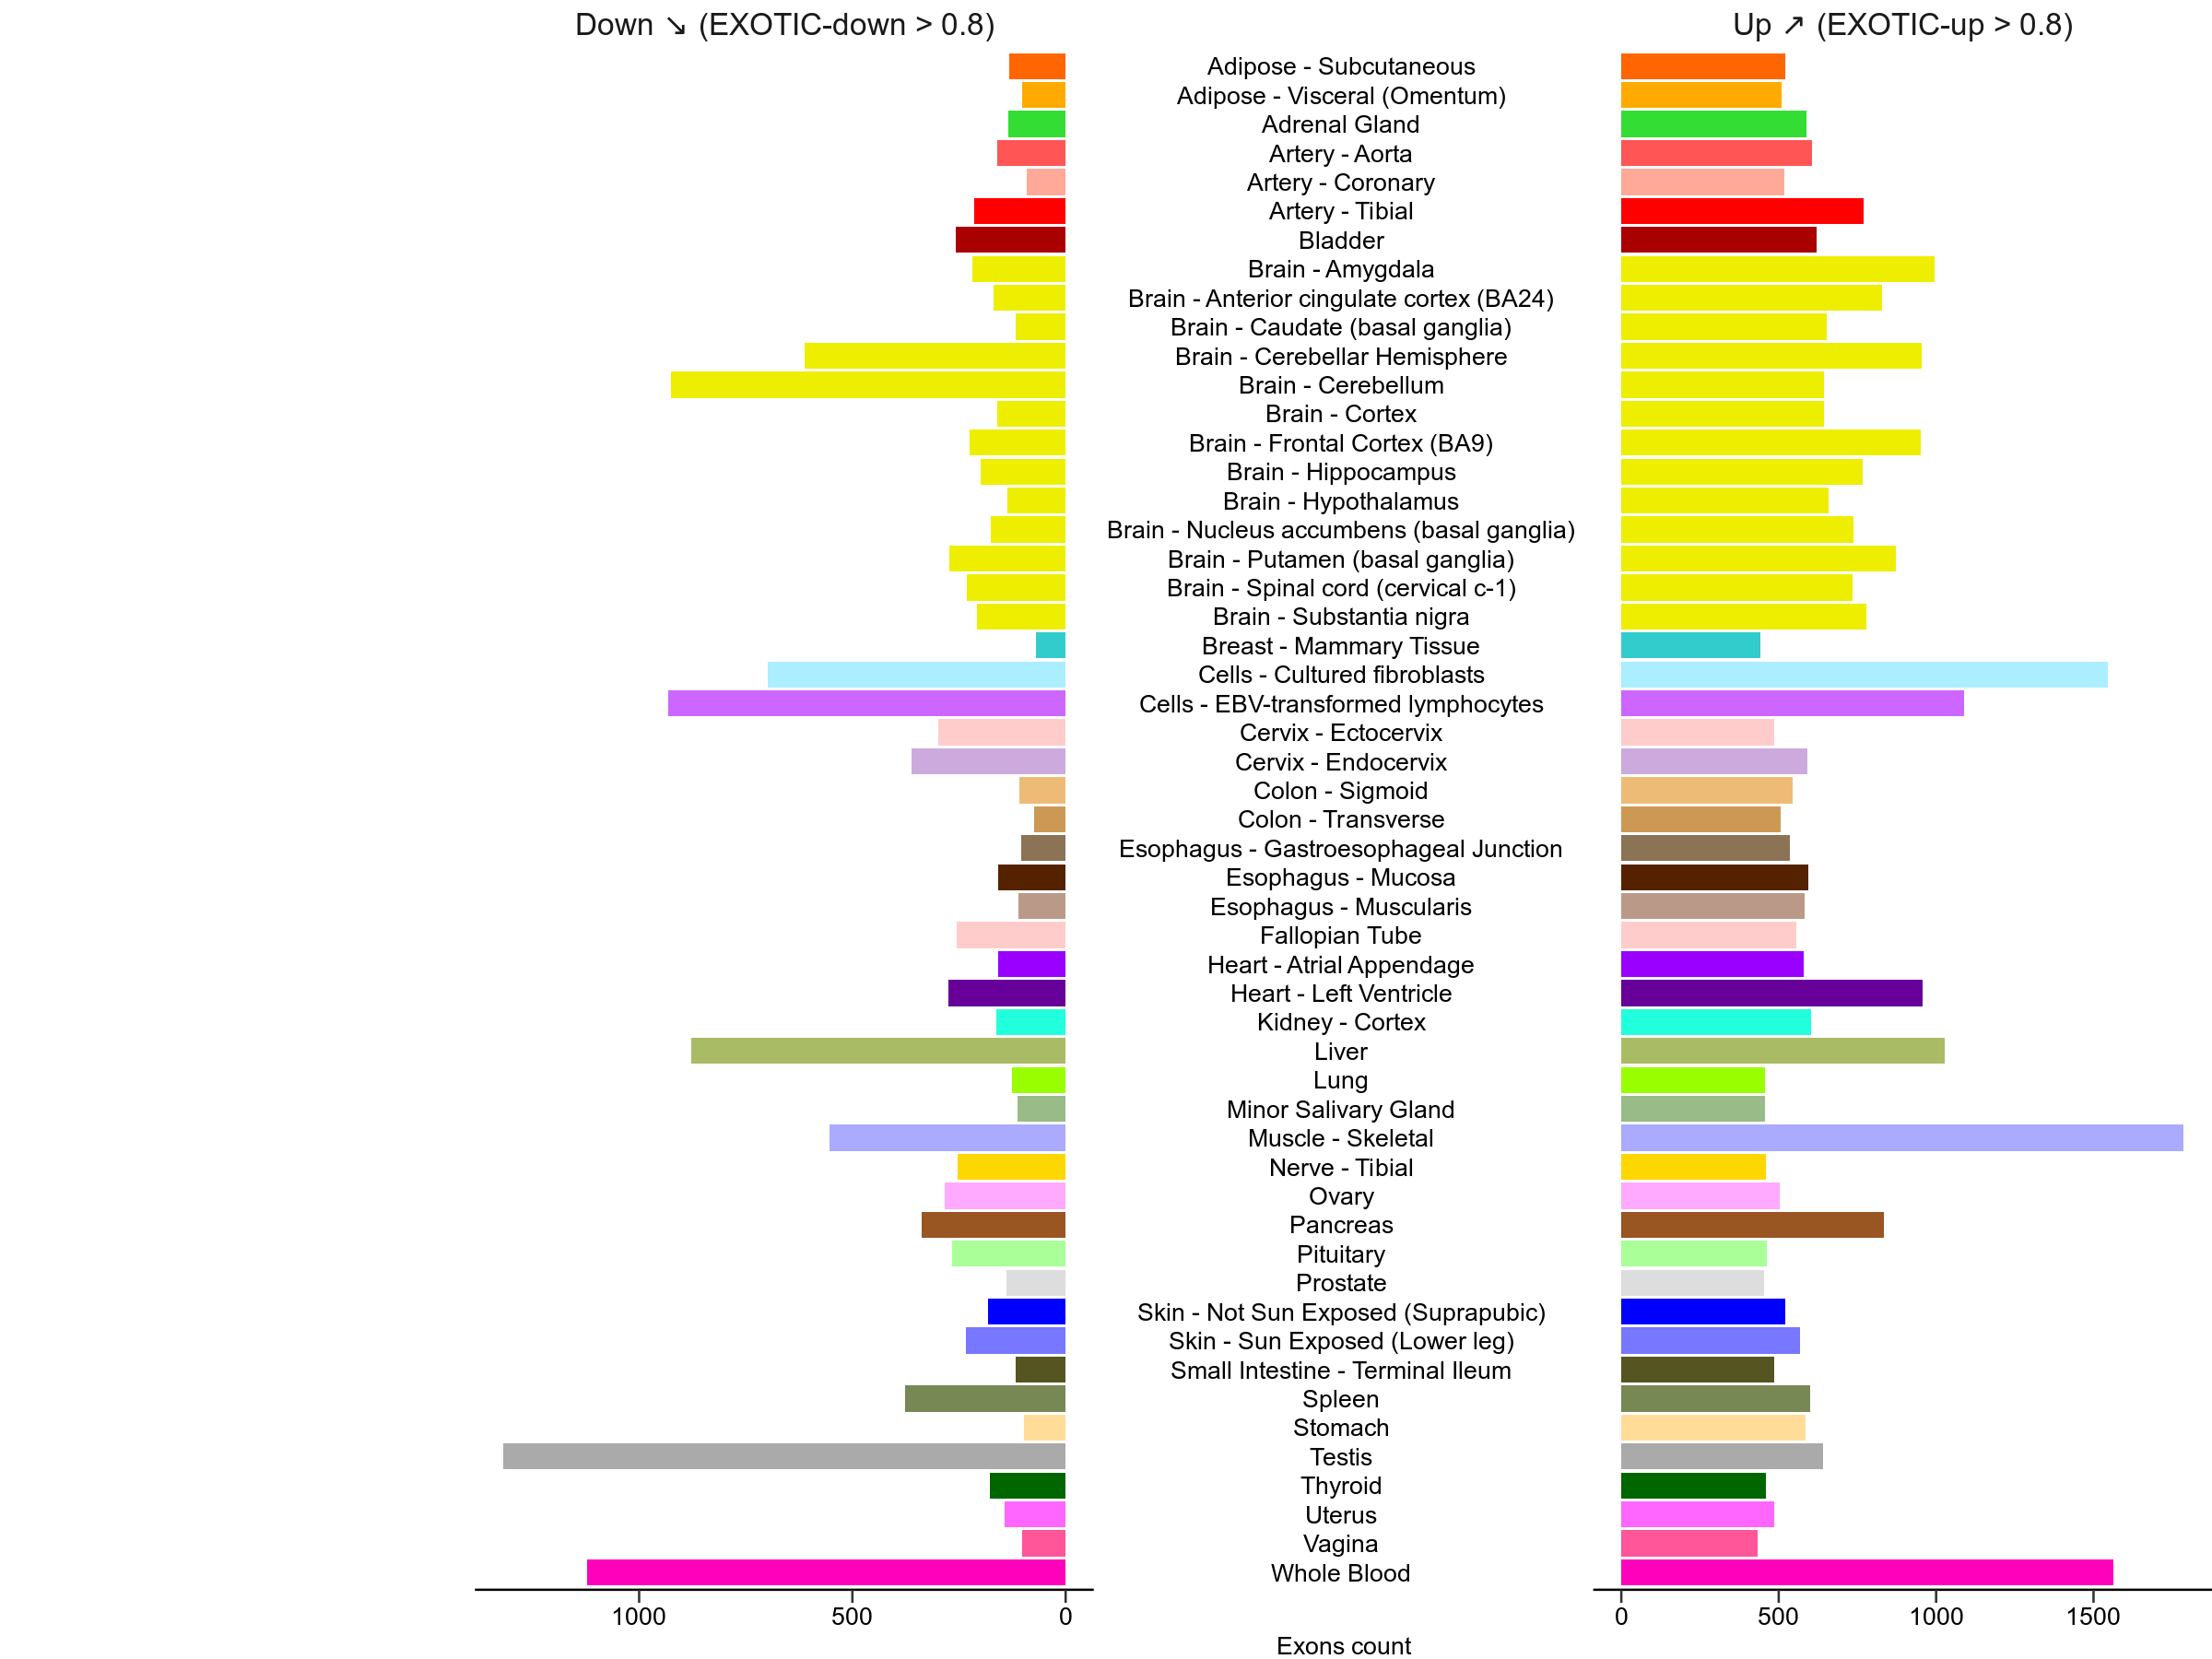

In [7]:
library(ggplot2)
library(ggpol)

options(repr.plot.width=20, repr.plot.height=15)


colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% merge_count$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)


p <- ggplot(merge_count, aes(x = factor(Tissue), y = count.x, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~Type, dir = "h", scales = "free", reverse_num = TRUE) +  scale_x_discrete(limits = rev(unique(merge_count$Tissue))) +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


p

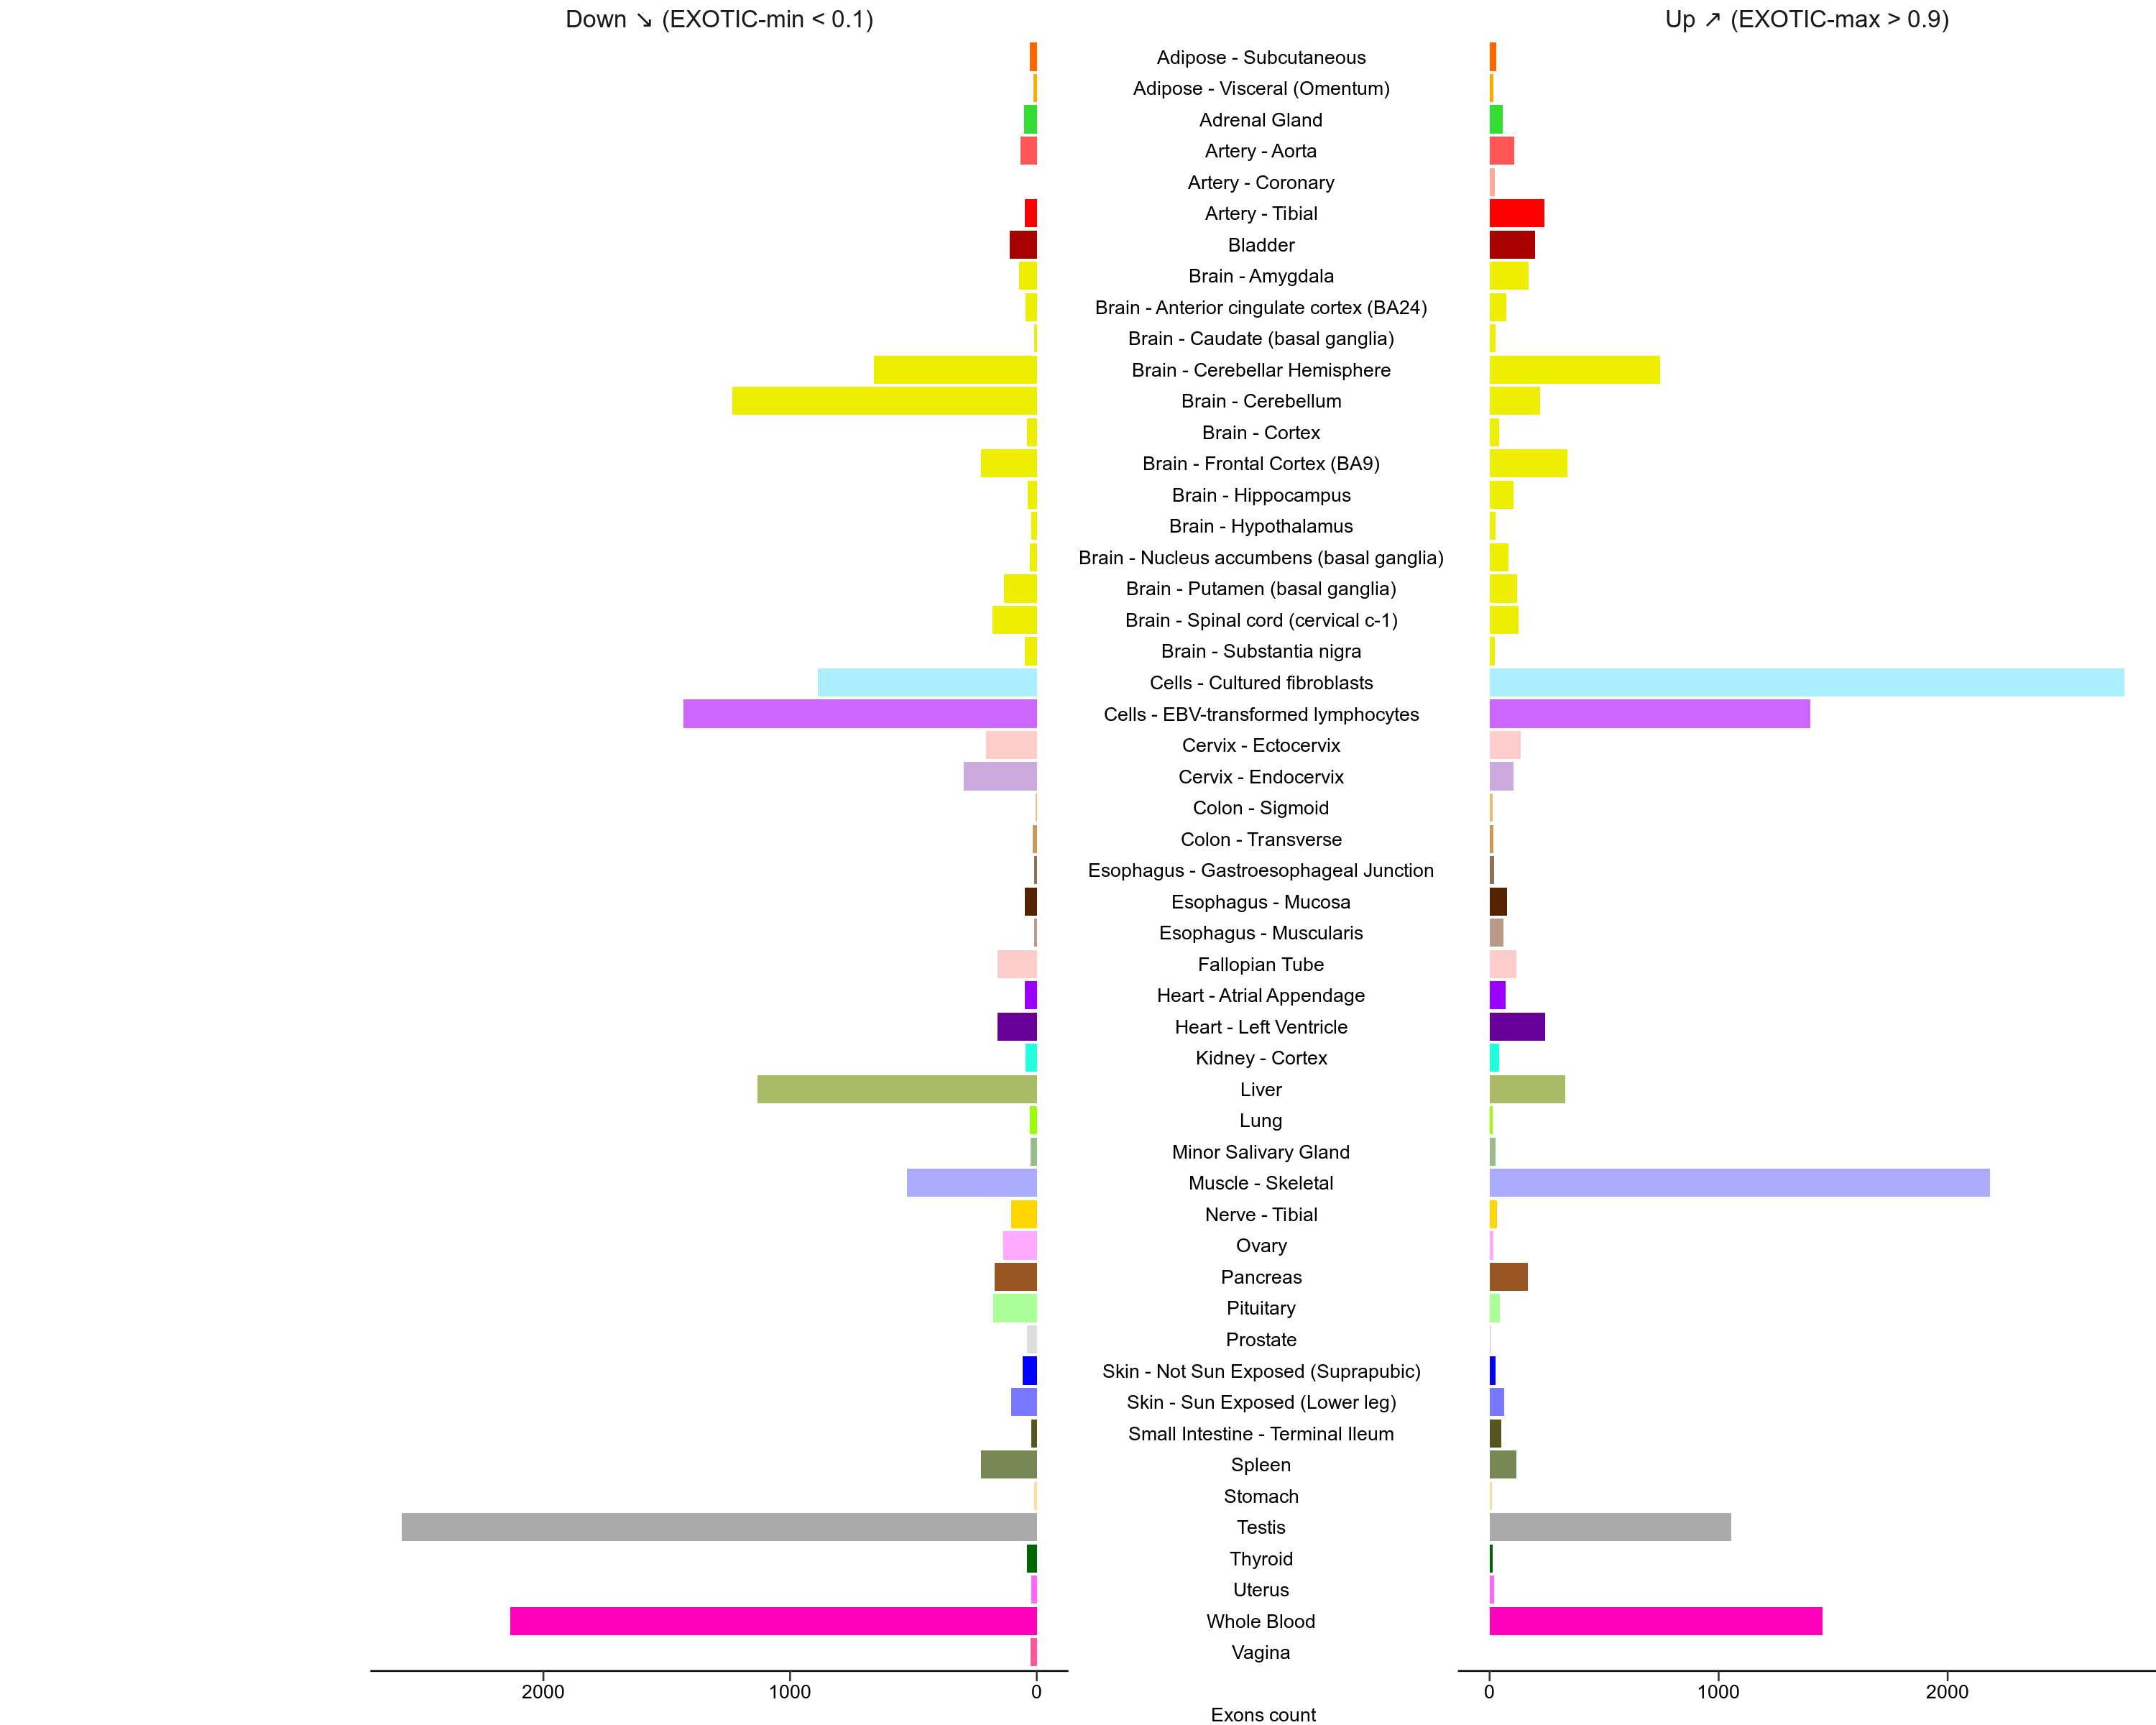

In [88]:
library(ggplot2)
library(ggpol)

colors <- read_excel("/gstock/EXOTIC/data/OTHERS/gtex_colors.xlsx")
colors = colors %>% arrange(Tissue)

colors = colors[colors$Tissue %in% merge_count$Tissue ,]
# merge_count_test = merge_count %>% arrange(count.x)


p <- ggplot(merge_count, aes(x = factor(Tissue), y = count.x, fill = Tissue)) + 
    geom_bar(stat = "identity") +
    facet_share(~Type, dir = "h", scales = "free", reverse_num = TRUE) +  scale_x_discrete(limits = rev(unique(merge_count$Tissue))) +
    coord_flip() +
    labs(x = "", y = "Exons count") + 
    theme(
        legend.position = "none", 
#         axis.ticks.y = element_blank(), 
        axis.ticks.length.y = unit(0,"cm"),
        axis.ticks.length.x = unit(0.3,"cm"),
        axis.text.y = element_text(color="black", size=16), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(), 
        axis.line = element_line(colour = "black"), 
        plot.margin=margin(l=0,unit="cm"), 
        panel.border = element_blank(), 
        axis.title.y=element_blank(), 
        
        axis.text.x = element_text(color="black", size=16),
        strip.background = element_rect(
     color="white", fill="white", size=1.5, linetype="solid"
     ),
        strip.text = element_text(size = 20)
               ) + 
  
    scale_fill_manual(values=colors$Color)


p

In [33]:
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))
# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)
df_h

gender,age,count
<chr>,<chr>,<dbl>
F,1 some long string that is too long,-31
M,1 some long string that is too long,20
F,10 some long string that is too long,-27
M,10 some long string that is too long,26
F,11 some long string that is too long,-23
M,11 some long string that is too long,23
F,12 some long string that is too long,-24
M,12 some long string that is too long,28
F,13 some long string that is too long,-25


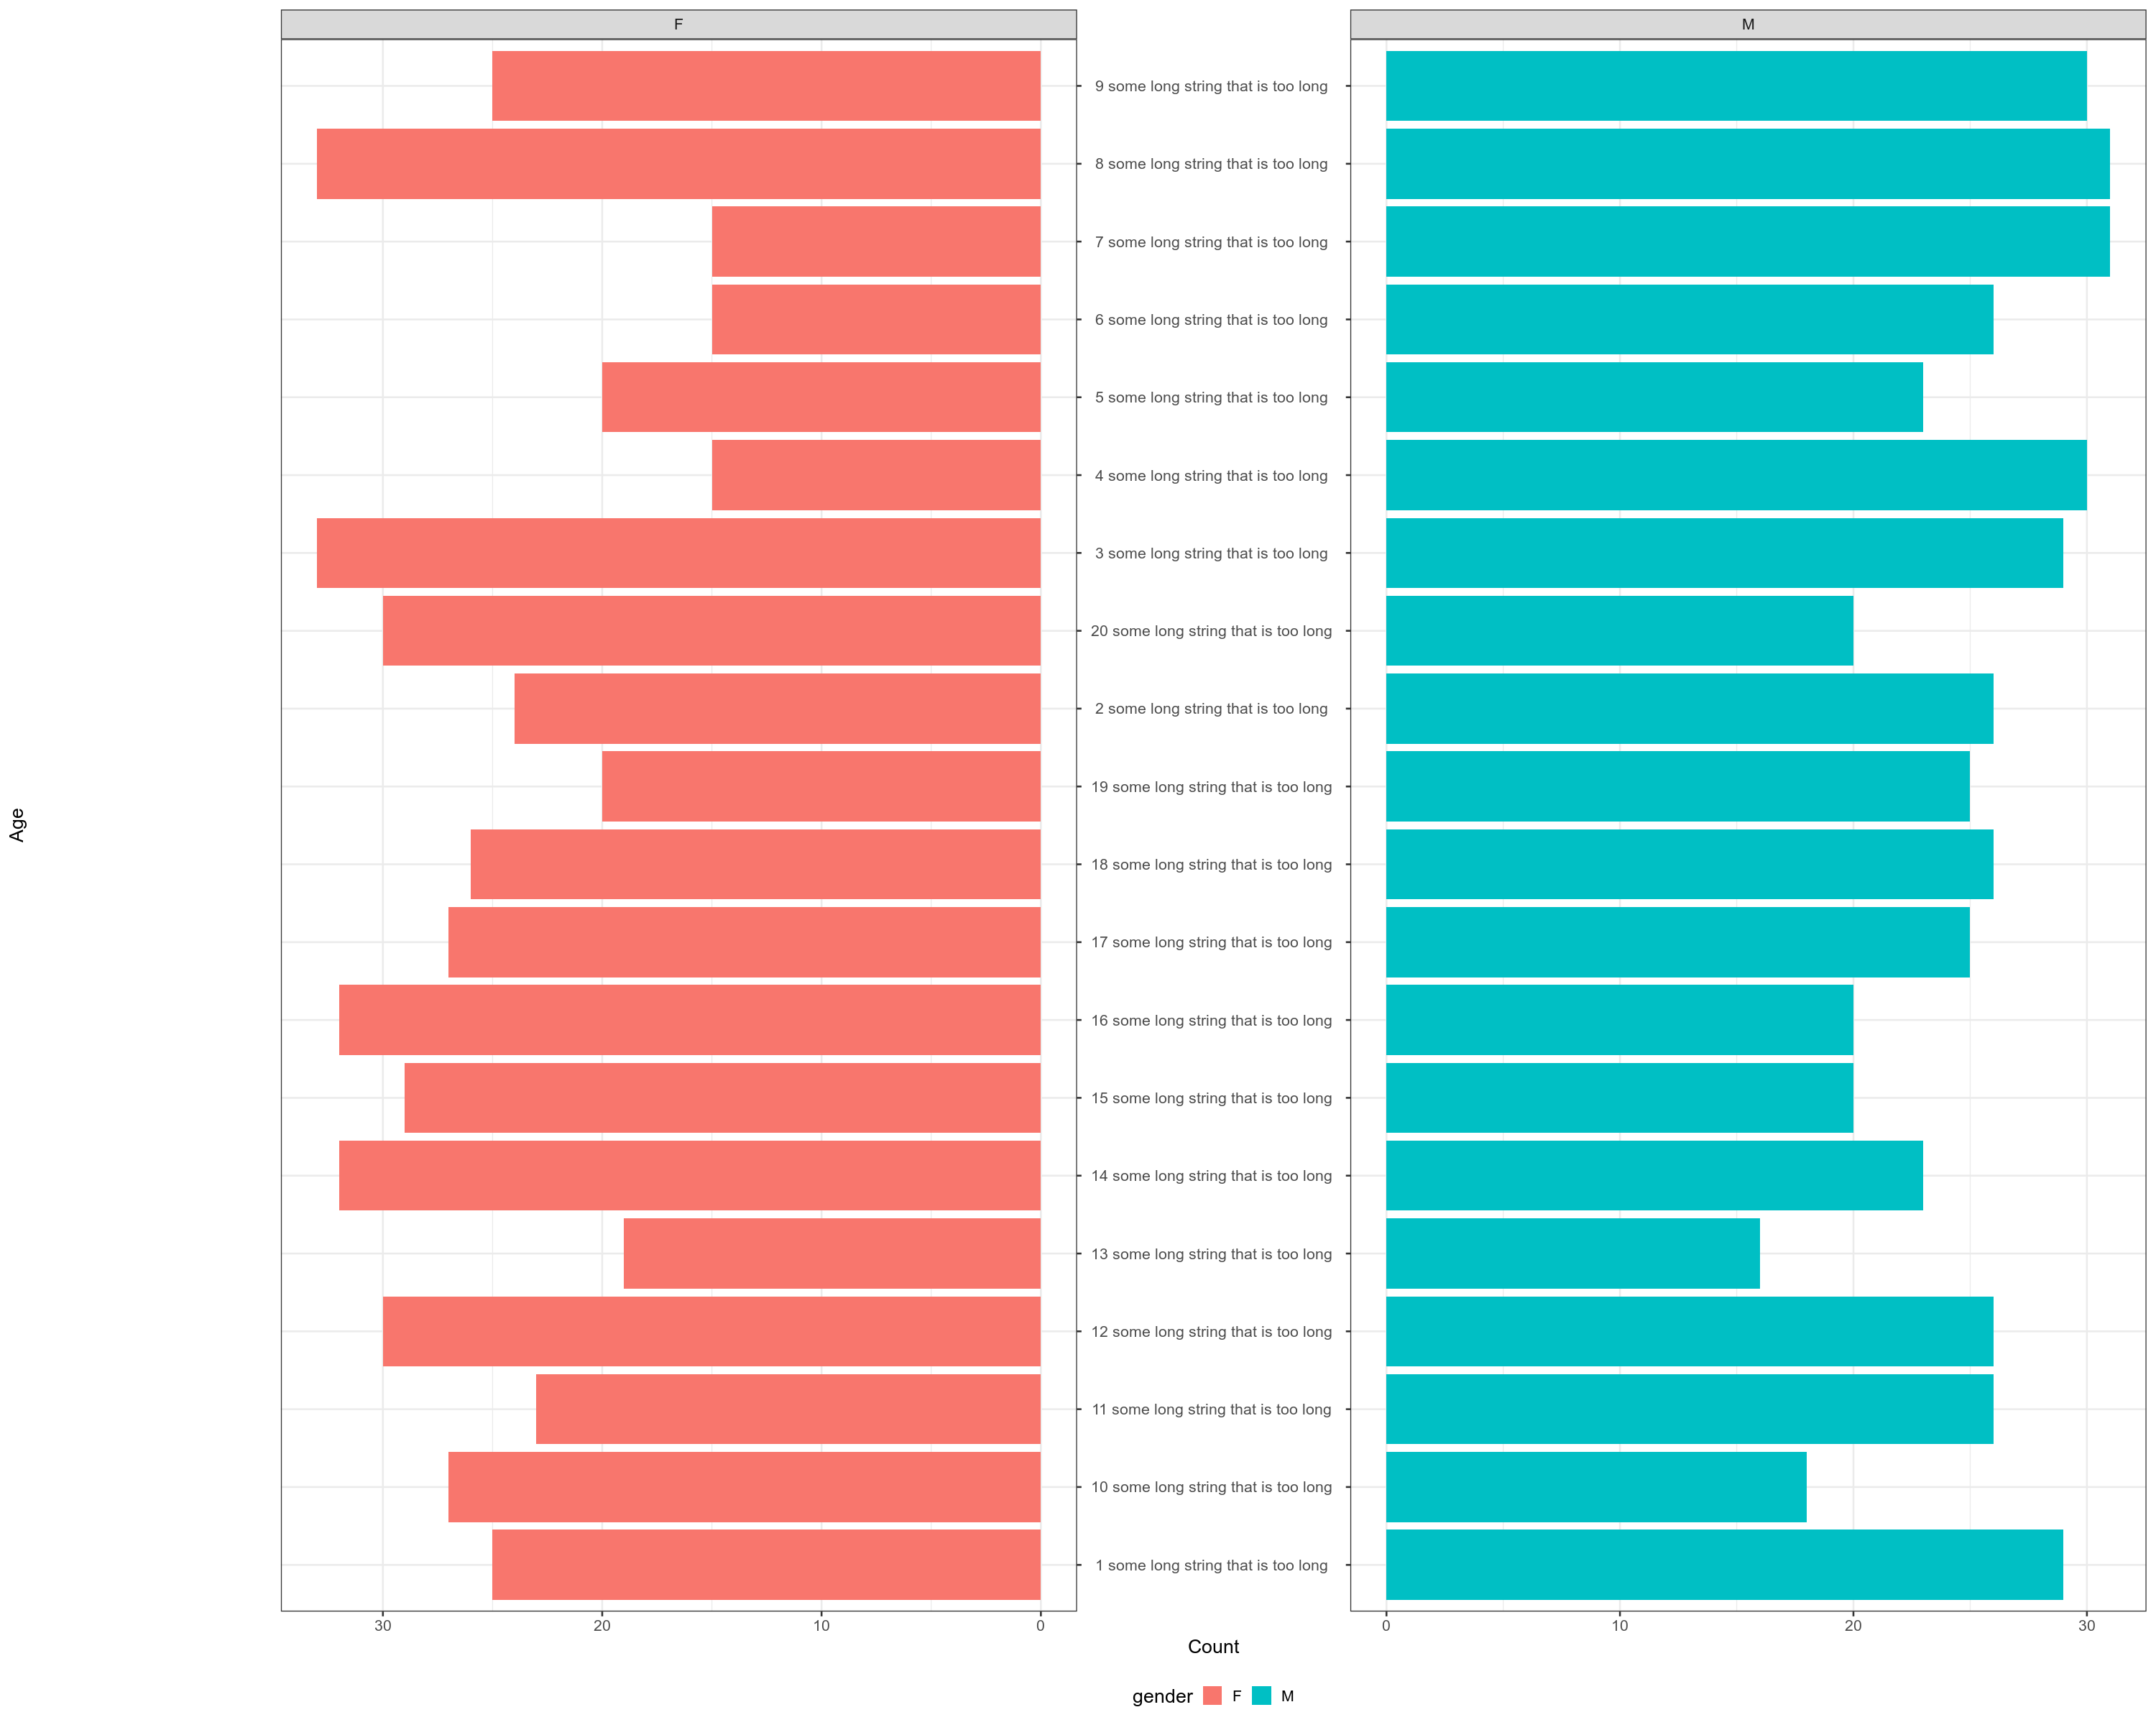

In [32]:
library(ggplot2)
library(ggpol)
df <- data.frame(age = sample(1:20, 1000, replace = TRUE), 
                 gender = c("M","F"), levels = c("M", "F"))

# Get the count per age and sex
df$count <- 1
df$age = paste(df$age, "some long string that is too long") # Added long labels
df <- aggregate(count ~ gender + age, data = df, length)

# For the horizontally shared axis, if we want to mirror the axes,
# we have to multiply the first panel by -1, and use coord_flip().
df_h <- df 
df_h$count = ifelse(df_h$gender == "F", df_h$count * -1, df_h$count)

p <- ggplot(df_h, aes(x = factor(age), y = count, fill = gender)) + 
  geom_bar(stat = "identity") +
  facet_share(~gender, dir = "h", scales = "free", reverse_num = TRUE) + 
  coord_flip() +
  labs(x = "Age", y = "Count") + 
  theme(legend.position = "bottom")

p